In [15]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


data_path = ("/Users/alexcroft/Documents/Thinkful/yelp_labelled.txt")
             
yelp_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
yelp_raw.columns = ['message', 'positive or negative']

In [16]:
yelp_raw.head()

,message,positive or negative
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [23]:
keywords = ['bad','not','disgusted','shocked','overpriced','Poor','old','unsatisfying','never','gross','disappointing','nasty','terrible','horrible']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(key)] = yelp_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False)

In [24]:
yelp_raw.head()

,message,positive or negative,bad,not,disgusted,shocked,overpriced,Poor,old,unsatisfying,never,gross,disappointing,nasty,terrible,horrible
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False


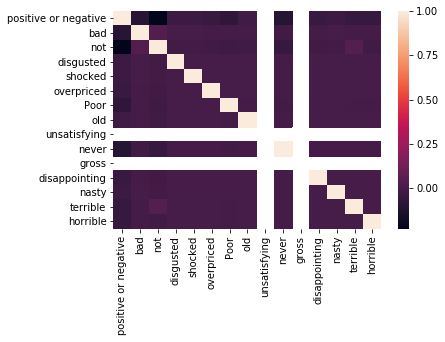

In [25]:
sns.heatmap(yelp_raw.corr())

In [26]:
data = yelp_raw[keywords]
target = yelp_raw['positive or negative']

In [27]:
from sklearn.naive_bayes import BernoulliNB 

bnb = BernoulliNB()

bnb.fit(data,target)

y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))


Number of mislabeled points out of a total 1000 points : 392
